In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mesa import Agent, Model
from mesa.datacollection import DataCollector
from mesa.time import BaseScheduler, RandomActivation

from model_classes import ContentMarketModel
from constants import *
from scheduler import AlternatingScheduler

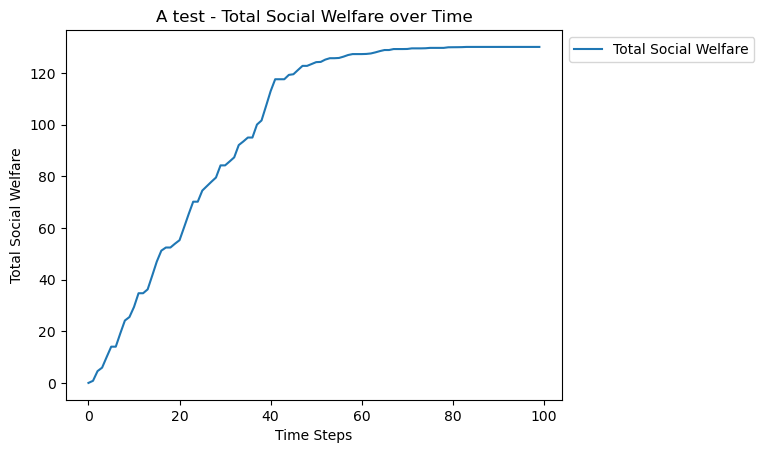

In [2]:
"""
TESTING CELL
"""
# Ensure results are reproducible
np.random.seed(0)

num_steps = 100

default_min_params = {
    'method': 'SLSQP',
}

default_params = {
    'num_members': 35,
    'M': 5.0,
    'M_INFL': 25.0,
    'is_perfect': True,
    'verbose': False,
    'influencer_update_frequency': 5
}

default_f = lambda x: np.exp(-x)
default_g = default_f

default_main_topics = np.random.rand(default_params['num_members'])
default_prod_topics = np.random.rand(default_params['num_members'])
default_infl_alloc = np.random.rand(default_params['num_members'])
default_mems_alloc = np.random.rand(default_params['num_members'], default_params['num_members'] + 2)

params = default_params.copy()
min_params = default_min_params.copy()

main_topics = default_main_topics.copy()
prod_topics = default_prod_topics.copy()
infl_alloc = default_infl_alloc.copy()
mems_alloc = default_mems_alloc.copy()

model = ContentMarketModel(
    params = params,
    main_topics = main_topics,
    prod_topics = prod_topics,
    infl_alloc = infl_alloc,
    mems_alloc = mems_alloc,
    min_params = min_params,
    f = default_f,
    g = default_g
)

for i in range(num_steps):
    model.step()

agent_df = model.datacollector.get_agent_vars_dataframe()
model_df = model.datacollector.get_model_vars_dataframe()

plt.plot(model_df["Total Social Welfare"], label = "Total Social Welfare")
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("A test - Total Social Welfare over Time")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Modelling with 5 community members
Modelling with 10 community members
Modelling with 20 community members
Modelling with 40 community members
Modelling with 70 community members
Modelling with 100 community members
Modelling with 120 community members
Modelling with 140 community members


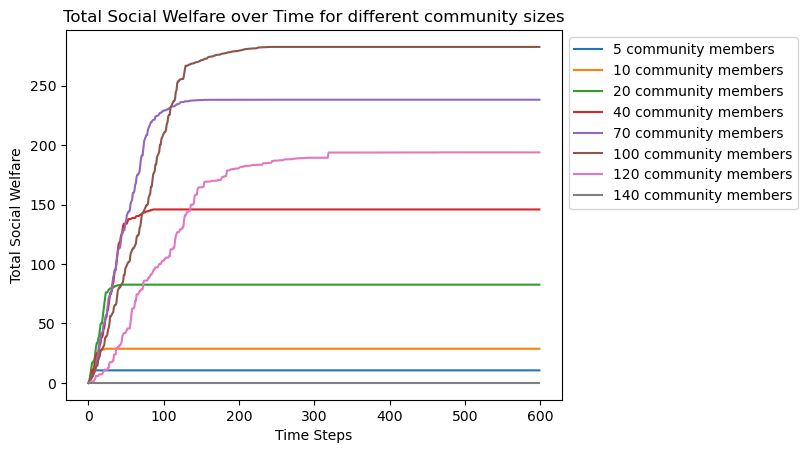

In [3]:
"""
VARYING COMMUNITY MEMBERS
"""

np.random.seed(0)
num_steps = 600

params = default_params.copy()
min_params = default_min_params.copy()

for n in [5, 10, 20, 40, 70, 100, 120, 140]:
    print(f"Modelling with {n} community members")

    params['num_members'] = n

    main_topics = np.random.rand(n)
    prod_topics = np.random.rand(n)
    infl_alloc = np.random.rand(n)
    mems_alloc = np.random.rand(n, n + 2)

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = default_min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"{n} community members")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for different community sizes")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Modelling with a influencer/consumer rate budget ratio of 1
Modelling with a influencer/consumer rate budget ratio of 2
Modelling with a influencer/consumer rate budget ratio of 5
Modelling with a influencer/consumer rate budget ratio of 10
Modelling with a influencer/consumer rate budget ratio of 25
Modelling with a influencer/consumer rate budget ratio of 50


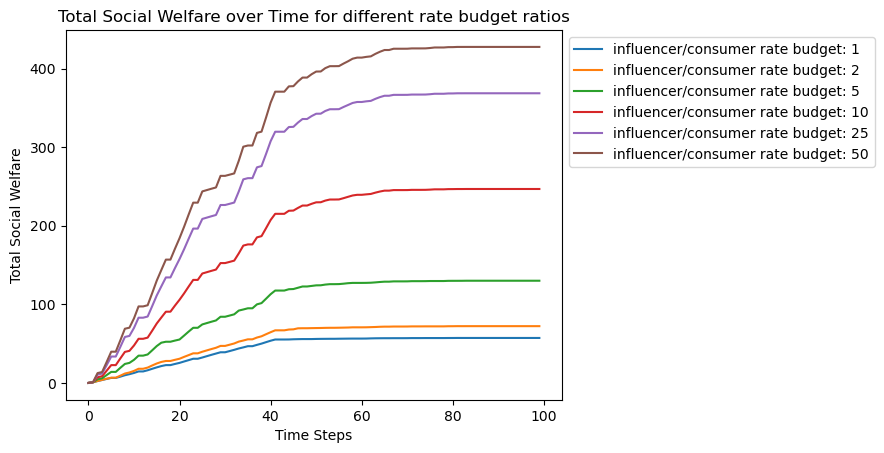

In [4]:
"""
VARYING RATE BUDGET RATIOS
"""
np.random.seed(0)
num_steps = 100

params = default_params.copy()

main_topics = default_main_topics,
prod_topics = default_prod_topics,
infl_alloc = default_infl_alloc,
mems_alloc = default_mems_alloc,

for n in [1, 2, 5, 10, 25, 50]:
    print(f"Modelling with a influencer/consumer rate budget ratio of {n}")

    main_topics = default_main_topics.copy()
    prod_topics = default_prod_topics.copy()
    infl_alloc = default_infl_alloc.copy()
    mems_alloc = default_mems_alloc.copy()

    params['M'] = 5.0
    params['M_INFL'] = n * params['M']

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"influencer/consumer rate budget: {n}")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for different rate budget ratios")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


Modelling while updating influencer every 1 updates for agents
Modelling while updating influencer every 2 updates for agents
Modelling while updating influencer every 3 updates for agents
Modelling while updating influencer every 5 updates for agents
Modelling while updating influencer every 10 updates for agents
Modelling while updating influencer every 25 updates for agents
Modelling while updating influencer every 50 updates for agents


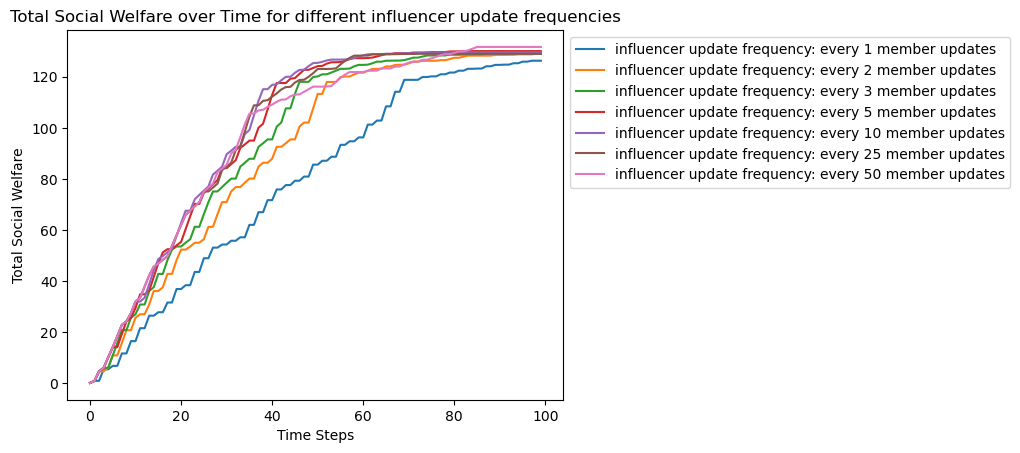

In [5]:
"""
VARYING INFLUENCER UPDATE FREQUENCIES
"""

np.random.seed(0)
num_steps = 100

params = default_params.copy()
min_params = default_min_params.copy()

for n in [1, 2, 3, 5, 10, 25, 50]:
    print(f"Modelling while updating influencer every {n} updates for agents")

    params['influencer_update_frequency'] = n

    main_topics = default_main_topics.copy()
    prod_topics = default_prod_topics.copy()
    infl_alloc = default_infl_alloc.copy()
    mems_alloc = default_mems_alloc.copy()

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = default_min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"influencer update frequency: every {n} member updates")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for different influencer update frequencies")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Modelling with probability function: f = g = exp(-0.1x)
Modelling with probability function: f = g = exp(-0.5x)
Modelling with probability function: f = g = exp(-1x)
Modelling with probability function: f = g = exp(-5x)
Modelling with probability function: f = g = exp(-10x)


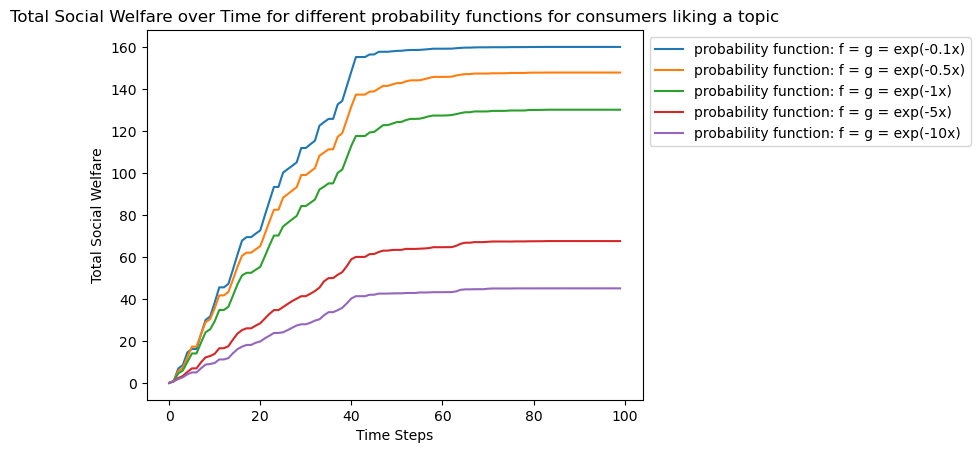

In [6]:
"""
VARYING PROBABILITY FUNCTION OF LIKING A TOPIC
"""

np.random.seed(0)
num_steps = 100

params = default_params.copy()
min_params = default_min_params.copy()

for n in [0.1, 0.5, 1, 5, 10]:
    print(f"Modelling with probability function: f = g = exp(-{n}x)")

    f = lambda x: np.exp(-n * x)
    g = f

    main_topics = default_main_topics.copy()
    prod_topics = default_prod_topics.copy()
    infl_alloc = default_infl_alloc.copy()
    mems_alloc = default_mems_alloc.copy()

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = default_min_params,
        f = f,
        g = g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"probability function: f = g = exp(-{n}x)")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for different probability functions for consumers liking a topic")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Modelling with randomly generated initial rate allocations scaled to a factor of 0.1
Modelling with randomly generated initial rate allocations scaled to a factor of 0.5
Modelling with randomly generated initial rate allocations scaled to a factor of 0.7
Modelling with randomly generated initial rate allocations scaled to a factor of 0.85
Modelling with randomly generated initial rate allocations scaled to a factor of 1


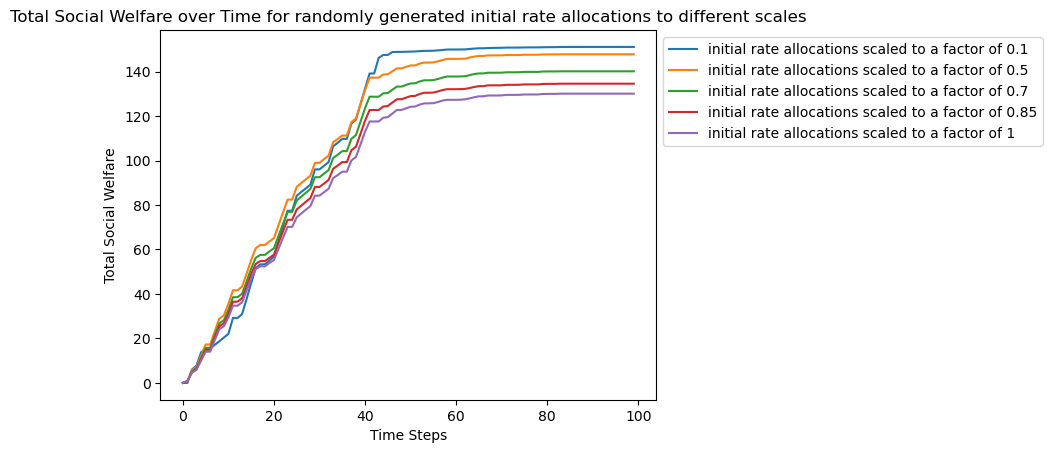

In [7]:
"""
VARYING THE SCALE OF RANDOMLY GENERATED INITIAL RATE ALLOCATIONS
"""

np.random.seed(0)
num_steps = 100

params = default_params.copy()
min_params = default_min_params.copy()

for n in [0.1, 0.5, 0.7, 0.85, 1]:
    print(f"Modelling with randomly generated initial rate allocations scaled to a factor of {n}")

    main_topics = default_main_topics.copy()
    prod_topics = default_prod_topics.copy()
    infl_alloc = default_infl_alloc.copy()
    mems_alloc = default_mems_alloc.copy()

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics * n,
        prod_topics = prod_topics * n,
        infl_alloc = infl_alloc * n,
        mems_alloc = mems_alloc * n,
        min_params = min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"initial rate allocations scaled to a factor of {n}")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for randomly generated initial rate allocations to different scales")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Modelling with uniform distribution
Modelling with beta distribution
Modelling with logistic distribution
Modelling with truncated_normal distribution


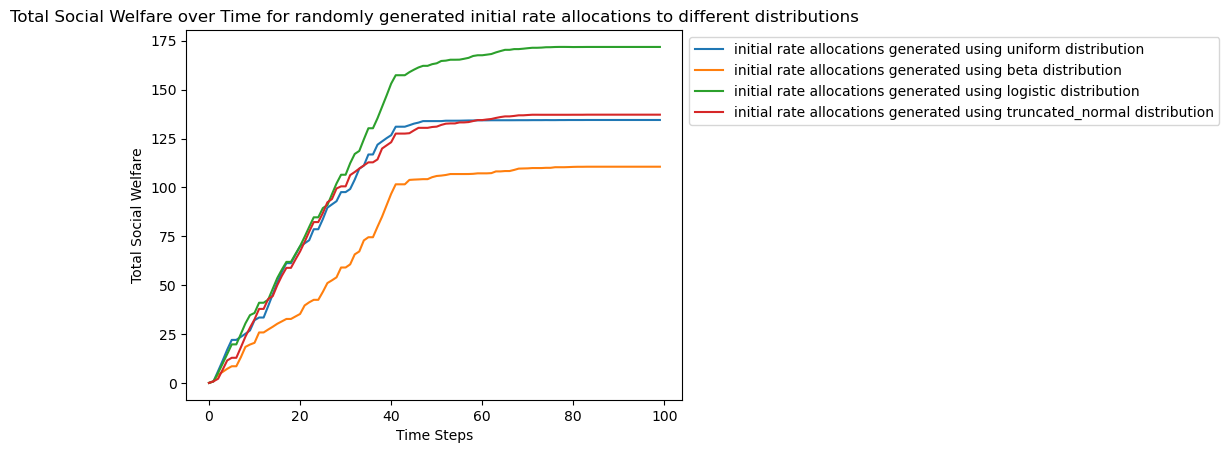

In [8]:
"""
TRYING OUT DIFFERENT INITIAL RATE ALLOCATIONS
"""
from scipy.stats import truncnorm

np.random.seed(0)
num_steps = 100

params = default_params.copy()
min_params = default_min_params.copy()
main_topics = default_main_topics.copy()

count = default_params['num_members']

prod_topics_dict = {
    'uniform': np.random.uniform(0, 1, count),
    'beta': np.random.beta(2, 5, size=count),
    'logistic': np.random.logistic(0.5, 0.05, size=count),
    'truncated_normal': truncnorm.rvs((0-0.5)/0.2, (1-0.5)/0.2, loc=0.5, scale=0.2, size=count)
}
infl_alloc_dict = {
    'uniform': np.random.uniform(0, 1, count),
    'beta': np.random.beta(2, 5, size=count),
    'logistic': np.random.logistic(0.5, 0.05, size=count),
    'truncated_normal': truncnorm.rvs((0-0.5)/0.2, (1-0.5)/0.2, loc=0.5, scale=0.2, size=count)
}
mems_alloc_dict = {
    'uniform': np.random.uniform(0, 1, size=(count, count+2)),
    'beta': np.random.beta(2, 5, size=(count, count+2)),
    'logistic': np.random.logistic(0.5, 0.05, size=(count, count+2)),
    'truncated_normal': truncnorm.rvs((0-0.5)/0.2, (1-0.5)/0.2, loc=0.5, scale=0.2, size=(count, count+2))
}

for dist in ['uniform', 'beta', 'logistic', 'truncated_normal']:
    print(f"Modelling with {dist} distribution")

    prod_topics = prod_topics_dict[dist]
    infl_alloc = infl_alloc_dict[dist]
    mems_alloc = mems_alloc_dict[dist]

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"initial rate allocations generated using {dist} distribution")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for randomly generated initial rate allocations to different distributions")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [9]:
"""
VISUALIZING THE CHANGE IN ALLOCATIONS OVER TIME
"""

import networkx as nx
from pyvis.network import Network
import ipywidgets as widgets
from IPython.display import display

np.random.seed(0)
num_steps = 100

params = default_params.copy()
params['verbose'] = False
params['M'] = 5.0
params['M_INFL'] = 25.0
params['num_members'] = 15
params['influencer_update_frequency'] = 2
min_params = default_min_params.copy()

main_topics = np.random.rand(params['num_members'])
prod_topics = np.random.rand(params['num_members'])
infl_alloc = np.random.rand(params['num_members'])
mems_alloc = np.random.rand(params['num_members'], params['num_members'] + 2)

model = ContentMarketModel(
    params = params,
    main_topics = main_topics,
    prod_topics = prod_topics,
    infl_alloc = infl_alloc,
    mems_alloc = mems_alloc,
    min_params = min_params,
    f = default_f,
    g = default_g
)

graph_data = []
prod_topics_arr = []

for step_num in range(num_steps):
    step_dict = {}
    for m in range(params['num_members']):
        for n in range(params['num_members'] + 1):
            if m != n:
                step_dict[(m, n)] = model.mems_alloc[m, n]
    
    for n in range(params['num_members']):
        step_dict[(params['num_members'], n)] = model.infl_alloc[n]

    prod_topics_arr.append(list(model.prod_topics))
        
    graph_data.append(step_dict)

    model.step()

In [10]:
def plot_graph(step):
    G = nx.DiGraph()
    for edge, weight_value in graph_data[step].items():
        G.add_edge(edge[0], edge[1], weight=weight_value)

    pos = nx.circular_layout(G)
    pos[params['num_members']] = np.array([0, 0])
    node_sizes = np.append(np.abs(prod_topics_arr[step] - np.mean(prod_topics_arr[step])), 1) * 2500
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', 
            edge_color='gray', width=[data['weight'] * 2.5 for _, _, data in G.edges(data=True)], 
            connectionstyle="arc3,rad=0.1")

    plt.title("Weighted Directed Graph for Step " + str(step))
    plt.show()

# Interactivity
steps = len(graph_data)
step_slider = widgets.IntSlider(value=0, min=0, max=steps-1, step=1, description='Step:')
widgets.interactive(plot_graph, step=step_slider)

interactive(children=(IntSlider(value=0, description='Step:', max=99), Output()), _dom_classes=('widget-intera…